# Lead Scoring Case study

### Problem statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Eventhough X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education wants select the promising leads by data analysing, i.e. the leads that are most likely to convert into paying customers. The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

1.To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.The model can able adjust to if the company's requirement changes in the future so you will need to handle these as well.

### Importing lib

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

### Import and read the data

In [3]:
xedu=pd.read_csv('Leads.csv')

In [4]:
# Understand the top row of the data

xedu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data inspection

In [5]:
# shape of the data

xedu.shape

(9240, 37)

In [6]:
# list of columns

xedu.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# summary of the data

xedu.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
xedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Expect 7 columns , rest are all categorical varaiable.Those needs to be assign with variable and few columns missing null values

### Data cleaning & Preparation

In [9]:
# check the missing values

xedu.isnull().sum()/len(xedu)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

There are lot of columns have more than 30% of missing values. Those can be removed, since these columns can't be helpfull for our prediction

In [10]:
# Drop all the columns in which greater than 30% missing values are present

for col in xedu.columns:
    if xedu[col].isnull().sum()/len(xedu)*100 > 30:
        xedu.drop(col, 1, inplace=True)

In [11]:
round(100*(xedu.isnull().sum()/len(xedu)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

The contry have quite missing value and city too both are not help us for our prediction. Hence both can be dropped from the data

In [12]:
xedu.drop(['Country','City'], axis=1, inplace=True)

In [13]:
round(100*(xedu.isnull().sum()/len(xedu)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

There are columns have mentioned 'Seclect" which is indicate that the user not slected any of the option. Those are considered as Null value. To identify those missing values , we can use value counts on the each column will figure out the values.

In [14]:
# Get the value counts of all the columns

for column in xedu:
    print(xedu[column].astype('category').value_counts())
    print('***********************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
***********************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
***********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************

Blow are list of columns that having the 'Select' category 

In [15]:
xedu['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
xedu['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
xedu['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

So the coloumn 'Lead Profile' & 'How did you hear about x Education' has more number of Select which means more missing values. Those can be droped 

In [18]:
xedu.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

In [19]:
round(100*(xedu.isnull().sum()/len(xedu)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Also based on the value counts analysis , we came to know there are many coulmns in which only one value was majorly present for all the data points. If we have these columns which will interpert the prediction. Better we can drop those columns.

Do Not Email,Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. All these columns dominate the value of "No". So its can't help our analysis


In [20]:
xedu.drop(['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [21]:
for column in xedu:
    print(xedu[column].astype('category').value_counts())
    print('***********************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
***********************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
***********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************

There is another column "What matters most to you in choosing a course" almost everyone choose the option of Better Career Prospects. So this can't be helpful for our analysis and we can drop the same

In [22]:
xedu.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

We have droped almost those columns are not helpful for the analysis. Let's check the missing value again and see how to impute further

In [23]:
round(100*(xedu.isnull().sum()/len(xedu)),2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Still we could see the column 'What is your current occupation' have close to 30% of missing values. But we already have very less variable to analysis. So instead of drop this columns we can remove only those rows having the missing values

In [24]:
xedu =xedu[~pd.isnull(xedu['What is your current occupation'])]

In [25]:
round(100*(xedu.isnull().sum()/len(xedu)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.55
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Last Activity                             1.57
Specialization                            0.27
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [26]:
xedu.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Now the number of missing values in the each columns have less number of counts. Let's we have drop those rows

In [27]:
xedu=xedu[~pd.isnull(xedu['TotalVisits'])]

In [28]:
xedu.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
# Drop the missing values rows in Lead Source

xedu=xedu[~pd.isnull(xedu['Lead Source'])]

In [30]:
xedu.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
# Drop the missing values rows in Specialization

xedu=xedu[~pd.isnull(xedu['Specialization'])]

In [32]:
xedu.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now we could see there is no missing values on the each columns. 

In [33]:
xedu.shape[0]/9240

0.6897186147186147

We have almost 70% of the data's that retained for our analises

The Prospect ID and Lead Number are unique and it won't be any use of the analysis . So we can drop both columns

In [34]:
xedu.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [35]:
xedu.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Data Visualization

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt

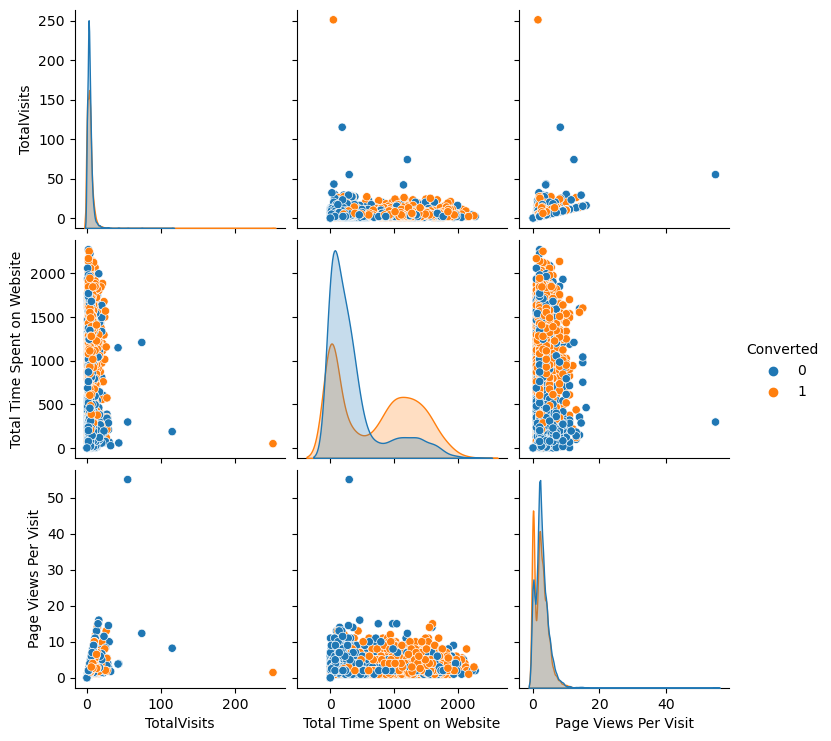

In [37]:
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

Based on the visuval , we could see that the Total visit and Page Viewes per vist has positively co-related

Let's check further for the categorical variable. To analysis the categorial column first will create dummies 

### Dummy Variable creation

In [38]:
cat_column = xedu.loc[:,xedu.dtypes=='object']

In [39]:
cat_column

,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,No,Modified
...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [40]:
cat_column.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# Create dummy variable for categorical columns using get_dummies command

dummy_var=pd.get_dummies(xedu[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                               'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [42]:
# add the dummies with master data

xedu=pd.concat([xedu,dummy_var],axis=1)

In [43]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(xedu['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xedu = pd.concat([xedu, dummy_spl], axis = 1)

In [44]:
# Let's we drop the original columns which we created for dummy

xedu = xedu.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [45]:
xedu.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split

In [46]:
# Import the required library

from sklearn.model_selection import train_test_split

In [47]:
# Put all the feature variables in X

X = xedu.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Putting response variable to y

y=xedu['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

There are few varaiable like Total visit and time spend on website , etc has different scale. To allign the everything the same scale using sklearn standardscaler

In [50]:
# Import required library

from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at Correlations

In [52]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

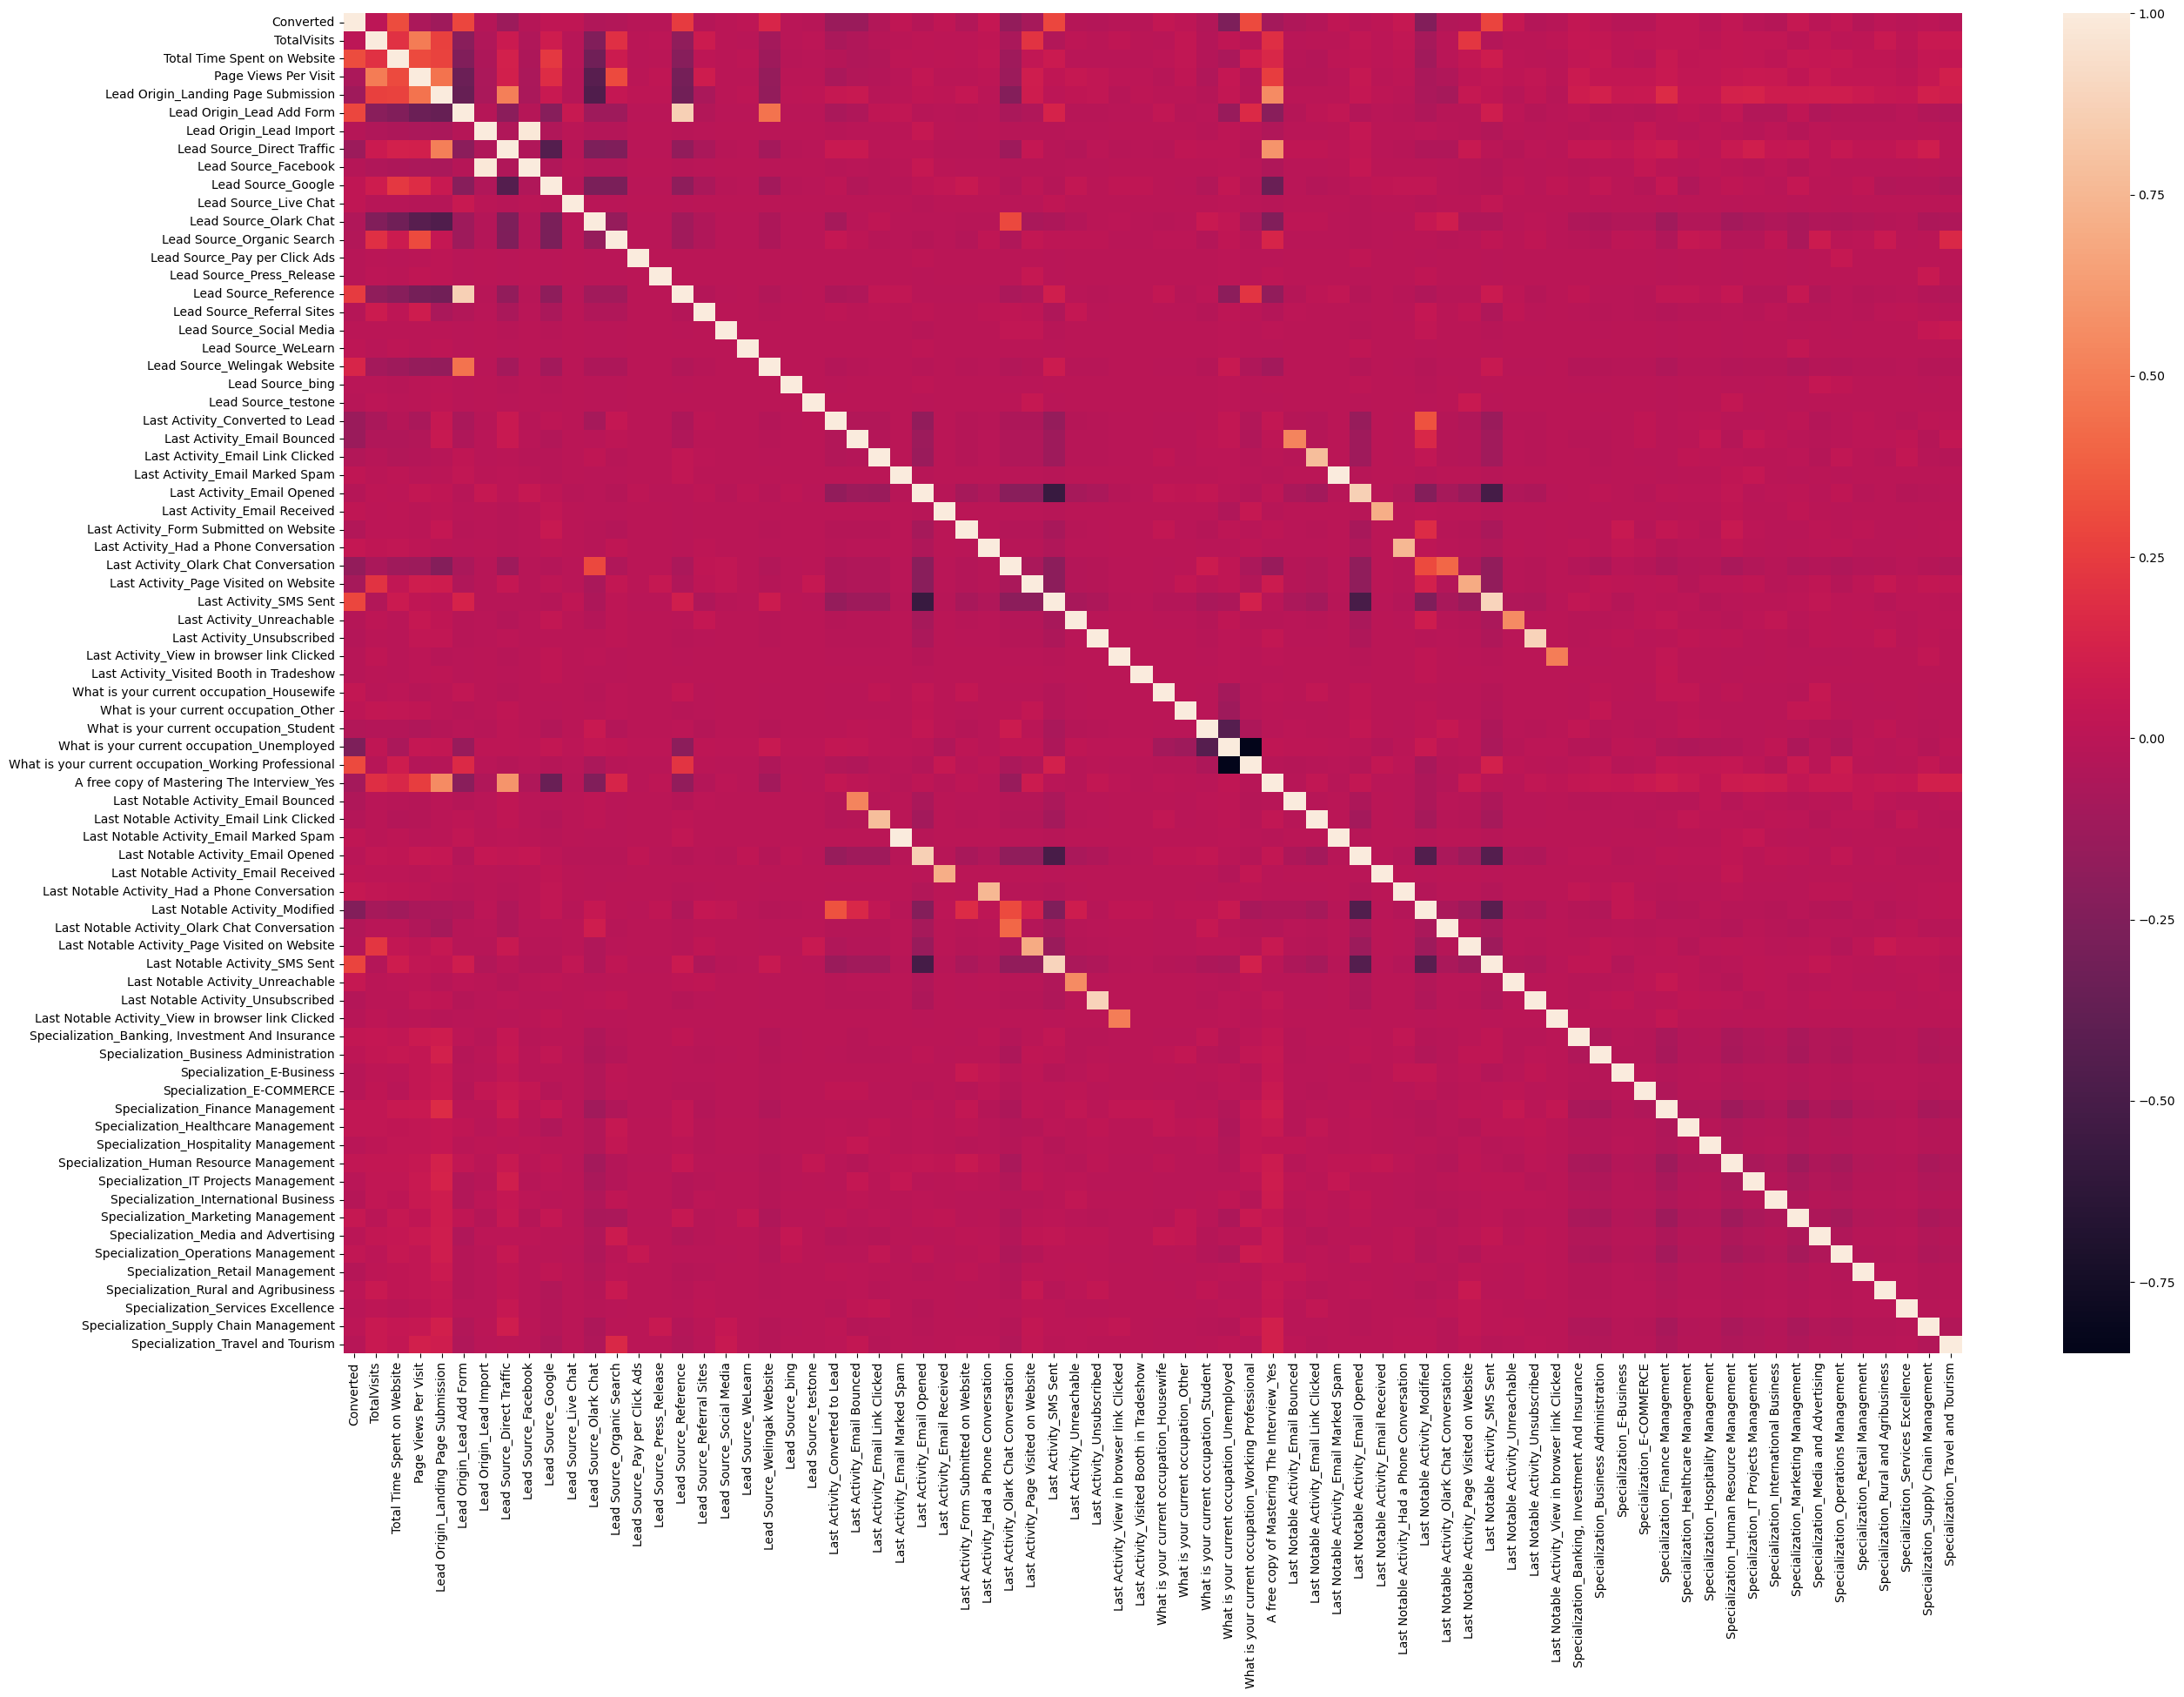

In [53]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(xedu.corr())
plt.show()

With that correlation matrix there are few variable highlighy co-related. Let's we start the model drop the high co-related varibale using RFE

### Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### Feature Selection using  RFE

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Acti

In [57]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [58]:
X_train = X_train[col]

No we have all the list of columns which is selected by RFE. Lets start the statatics part and find the P-value and VIF's using the statsmodels

### Assesing the model with StatsModels

In [59]:
# Import statsmodels

import statsmodels.api as sm

In [60]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Mon, 18 Sep 2023   Deviance:                       4188.8
Time:                        20:48:41   Pearson chi2:                 4.92e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3598
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0318      0.610     -1.692      0.091      -2.227       0.163
TotalVisits                                              9.6750      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4599      0.184     24.201      0.000       4.099       4.821
Lead Origin_Lead Add Form                                2.9836      1.187      2.513      0.012       0.657       5.311
Lead Source_Olark Chat                                   1.4640      0.122     11.997      0.000       1.225       1.703
Lead Source_Reference                                    1.2246      1.210      1.012      0.312      -1.147       3.596
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.249       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0754      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1088      0.082     13.585      0.000       0.949       1.269
What is your current occupation_Housewife               22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
What is your current occupation_Student                 -1.1259      0.639     -1.762      0.078      -2.379       0.127
What is your current occupation_Unemployed              -1.3232      0.604     -2.190      0.029      -2.507      -0.139
What is your current occupation_Working Professional     1.2999      0.633      2.055      0.040       0.060       2.540
Last Notable Activity_Had a Phone Conversation          23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.8181      0.807      3.491      0.000       1.236       4.400
========================================================================================================================
"""

On the RFE feature selection there are few variable still have P-Value over 0.05. Let's check the VIF's for the same

In [61]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
12,What is your current occupation_Working Profes...,1.57


There are 3 variable VIF score is higher then 5. So let's we drop 'Lead Source_Reference" which having the higer VIF 

In [63]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.8
Date:                Mon, 18 Sep 2023   Deviance:                       4189.7
Time:                        20:49:07   Pearson chi2:                 4.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0312      0.610     -1.692      0.091      -2.226       0.164
TotalVisits                                              9.6751      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4600      0.184     24.200      0.000       4.099       4.821
Lead Origin_Lead Add Form                                4.1703      0.258     16.139      0.000       3.664       4.677
Lead Source_Olark Chat                                   1.4640      0.122     11.996      0.000       1.225       1.703
Lead Source_Welingak Website                             2.1096      1.036      2.036      0.042       0.079       4.141
Last Activity_Email Bounced                             -1.6917      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0753      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1087      0.082     13.583      0.000       0.949       1.269
What is your current occupation_Housewife               22.6911   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1253      0.639     -1.761      0.078      -2.378       0.127
What is your current occupation_Unemployed              -1.3237      0.604     -2.191      0.028      -2.508      -0.140
What is your current occupation_Working Professional     1.3004      0.633      2.056      0.040       0.061       2.540
Last Notable Activity_Had a Phone Conversation          23.2095   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.8184      0.807      3.492      0.000       1.236       4.400
========================================================================================================================
"""

Still we have few more variable P-Value is over 0.05 , So let's calculate the VIF's again for the current data set

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


The VIF's values are now less than 5 for all the variable. So we can drop based on the highligher P-value variable of "What is your current occupation_Housewife" and let's run the model again

In [66]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.1
Date:                Mon, 18 Sep 2023   Deviance:                       4194.2
Time:                        20:49:20   Pearson chi2:                 4.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4547      0.559     -0.814      0.416      -1.549       0.640
TotalVisits                                              9.4513      2.769      3.413      0.001       4.024      14.879
Total Time Spent on Website                              4.4588      0.184     24.203      0.000       4.098       4.820
Lead Origin_Lead Add Form                                4.1674      0.258     16.136      0.000       3.661       4.674
Lead Source_Olark Chat                                   1.4586      0.122     11.966      0.000       1.220       1.698
Lead Source_Welingak Website                             2.1079      1.036      2.034      0.042       0.077       4.139
Last Activity_Email Bounced                             -1.6928      0.366     -4.628      0.000      -2.410      -0.976
Last Activity_Had a Phone Conversation                   1.0757      0.984      1.093      0.274      -0.852       3.004
Last Activity_SMS Sent                                   1.1083      0.082     13.580      0.000       0.948       1.268
What is your current occupation_Student                 -1.6972      0.592     -2.865      0.004      -2.858      -0.536
What is your current occupation_Unemployed              -1.8955      0.554     -3.419      0.001      -2.982      -0.809
What is your current occupation_Working Professional     0.7284      0.585      1.245      0.213      -0.419       1.875
Last Notable Activity_Had a Phone Conversation          22.2117   1.26e+04      0.002      0.999   -2.46e+04    2.47e+04
Last Notable Activity_Unreachable                        2.8157      0.808      3.487      0.000       1.233       4.398
========================================================================================================================
"""

The "Last Notable Activity_Had a Phone Conversation" variable is still showing the P-Value of 0.999 let's drop and re-run the model again

In [68]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [69]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.0
Date:                Mon, 18 Sep 2023   Deviance:                       4200.0
Time:                        20:49:29   Pearson chi2:                 4.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3582
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4561      0.558     -0.817      0.414      -1.551       0.638
TotalVisits                                              9.5775      2.773      3.454      0.001       4.143      15.012
Total Time Spent on Website                              4.4513      0.184     24.179      0.000       4.090       4.812
Lead Origin_Lead Add Form                                4.1675      0.258     16.136      0.000       3.661       4.674
Lead Source_Olark Chat                                   1.4586      0.122     11.966      0.000       1.220       1.698
Lead Source_Welingak Website                             2.1078      1.036      2.034      0.042       0.077       4.139
Last Activity_Email Bounced                             -1.6917      0.366     -4.626      0.000      -2.408      -0.975
Last Activity_Had a Phone Conversation                   2.8034      0.802      3.497      0.000       1.232       4.375
Last Activity_SMS Sent                                   1.1082      0.082     13.583      0.000       0.948       1.268
What is your current occupation_Student                 -1.6956      0.592     -2.863      0.004      -2.856      -0.535
What is your current occupation_Unemployed              -1.8940      0.554     -3.417      0.001      -2.980      -0.808
What is your current occupation_Working Professional     0.7277      0.585      1.244      0.214      -0.419       1.874
Last Notable Activity_Unreachable                        2.8147      0.807      3.486      0.000       1.232       4.397
========================================================================================================================
"""

There is one more Variable "What is your current occupation_Working Professional" having P-Value of 0.05. So let's drop the variable and re-fit the model

In [70]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [71]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Mon, 18 Sep 2023   Deviance:                       4201.5
Time:                        20:49:40   Pearson chi2:                 4.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2044      0.196      1.042      0.297      -0.180       0.589
TotalVisits                                    9.4577      2.766      3.419      0.001       4.037      14.879
Total Time Spent on Website                    4.4526      0.184     24.184      0.000       4.092       4.813
Lead Origin_Lead Add Form                      4.1672      0.258     16.137      0.000       3.661       4.673
Lead Source_Olark Chat                         1.4582      0.122     11.969      0.000       1.219       1.697
Lead Source_Welingak Website                   2.1066      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                   -1.6834      0.365     -4.616      0.000      -2.398      -0.969
Last Activity_Had a Phone Conversation         2.8075      0.802      3.502      0.000       1.236       4.379
Last Activity_SMS Sent                         1.1117      0.081     13.644      0.000       0.952       1.271
What is your current occupation_Student       -2.3554      0.280     -8.420      0.000      -2.904      -1.807
What is your current occupation_Unemployed    -2.5542      0.186    -13.761      0.000      -2.918      -2.190
Last Notable Activity_Unreachable              2.8162      0.807      3.488      0.000       1.234       4.399
==============================================================================================================
"""

Looks pretty good model, since all the variable P-Value is 0.05. Let's check VIF's score to see if we missed anything

In [72]:
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Mon, 18 Sep 2023   Deviance:                       4201.5
Time:                        20:49:47   Pearson chi2:                 4.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3580
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2044      0.196      1.042      0.297      -0.180       0.589
TotalVisits                                    9.4577      2.766      3.419      0.001       4.037      14.879
Total Time Spent on Website                    4.4526      0.184     24.184      0.000       4.092       4.813
Lead Origin_Lead Add Form                      4.1672      0.258     16.137      0.000       3.661       4.673
Lead Source_Olark Chat                         1.4582      0.122     11.969      0.000       1.219       1.697
Lead Source_Welingak Website                   2.1066      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                   -1.6834      0.365     -4.616      0.000      -2.398      -0.969
Last Activity_Had a Phone Conversation         2.8075      0.802      3.502      0.000       1.236       4.379
Last Activity_SMS Sent                         1.1117      0.081     13.644      0.000       0.952       1.271
What is your current occupation_Student       -2.3554      0.280     -8.420      0.000      -2.904      -1.807
What is your current occupation_Unemployed    -2.5542      0.186    -13.761      0.000      -2.918      -2.190
Last Notable Activity_Unreachable              2.8162      0.807      3.488      0.000       1.234       4.399
==============================================================================================================
"""

### Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [73]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.277667
218     0.137924
4171    0.122293
4037    0.290762
3660    0.949265
207     0.188492
2044    0.175462
6411    0.948679
6498    0.064093
2085    0.980619
dtype: float64

In [74]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27766695, 0.1379242 , 0.12229282, 0.29076236, 0.94926508,
       0.18849228, 0.17546212, 0.94867887, 0.06409252, 0.98061944])

In [75]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.277667
1,0,0.137924
2,1,0.122293
3,1,0.290762
4,1,0.949265


### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [76]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.277667,0
1,0,0.137924,0
2,1,0.122293,0
3,1,0.290762,0
4,1,0.949265,1


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.


In [77]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [78]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 561 1588]]


In [79]:
# Predicted     not_churn    churn
# Actual
# not_churn        1927      385
# churn            561      1588   

In [80]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.787939923783905


In [81]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Calculate the sensitivity

TP/(TP+FN)

0.7389483480688692

In [83]:
# Calculate the specificity

TN/(TN+FP)

0.8334775086505191

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [84]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [86]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

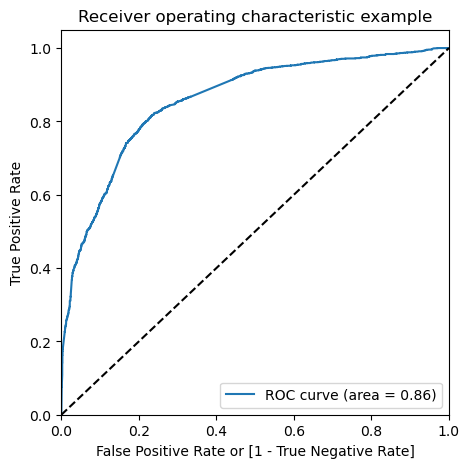

In [87]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [88]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.513114  0.992089  0.067907
0.2   0.2  0.692221  0.947417  0.455017
0.3   0.3  0.766196  0.863658  0.675606
0.4   0.4  0.789733  0.803630  0.776817
0.5   0.5  0.787940  0.738948  0.833478
0.6   0.6  0.755660  0.622615  0.879325
0.7   0.7  0.732795  0.538855  0.913062
0.8   0.8  0.709482  0.447650  0.952855
0.9   0.9  0.642009  0.276408  0.981834


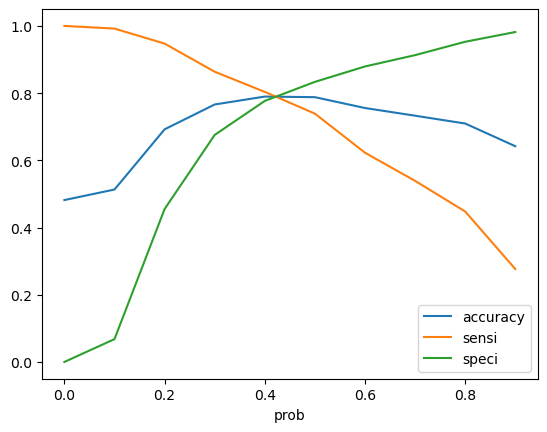

In [90]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [92]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [93]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1830,  482],
       [ 454, 1695]], dtype=int64)

In [94]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Calculate Sensitivity

TP/(TP+FN)

0.7887389483480689

In [96]:
# Calculate Specificity

TN/(TN+FP)

0.7915224913494809

The cut of point is 0.42 looks good. Since it has 78% of sensitivity and 79% of specificity

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [97]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [98]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [99]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [100]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,0,0,1,0,0,1,0,0,0


In [101]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)


In [102]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [103]:
y_test_pred[:10]

4771    0.995862
6122    0.123821
9202    0.683205
6570    0.636989
2668    0.694922
4233    0.941270
3368    0.703722
9091    0.450195
5972    0.263949
3631    0.768897
dtype: float64

In [104]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
# Let's see the head

y_pred_1.head()

,0
4771,0.995862
6122,0.123821
9202,0.683205
6570,0.636989
2668,0.694922


In [106]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [107]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [110]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [111]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [112]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [113]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995862,1
1,0,0.123821,0
2,0,0.683205,1
3,1,0.636989,1
4,1,0.694922,1


In [114]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7881799163179917

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[792, 204],
       [201, 715]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Calculate sensitivity
TP / float(TP+FN)

0.7805676855895196

In [118]:
# Calculate specificity
TN / float(TN+FP)

0.7951807228915663

### Precision-Recall View

Let's build the training model using the precision-recall view

In [119]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1927,  385],
       [ 561, 1588]], dtype=int64)

#### Precision
TP / TP + FP

In [121]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8048656867714141

### Recall
TP / TP + FN

In [122]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7389483480688692

### Precision and recall tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

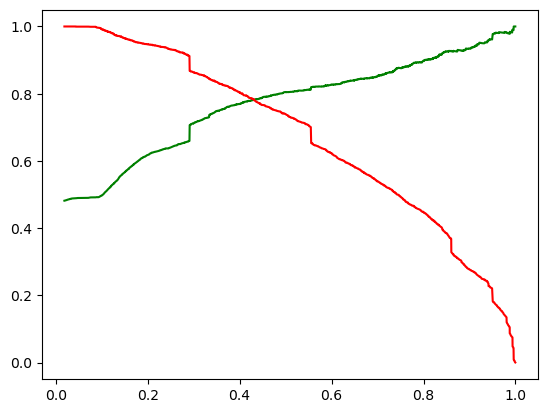

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [175]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.277667,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137924,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122293,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290762,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.949265,1,1,1,1,1,1,1,1,1,1,1,1


In [176]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7901815736381977

In [177]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1830,  482],
       [ 454, 1695]], dtype=int64)

In [178]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Calculate Precision

TP/(TP+FP)

0.77859439595774

In [180]:
# Calculate Recall

TP/(TP+FN)

0.7887389483480689

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [181]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [182]:
y_test_pred[:10]

4771    0.995862
6122    0.123821
9202    0.683205
6570    0.636989
2668    0.694922
4233    0.941270
3368    0.703722
9091    0.450195
5972    0.263949
3631    0.768897
dtype: float64

In [183]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
# Let's see the head

y_pred_1.head()

,0
4771,0.995862
6122,0.123821
9202,0.683205
6570,0.636989
2668,0.694922


In [185]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [186]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [189]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [190]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995862
1,0,0.123821
2,0,0.683205
3,1,0.636989
4,1,0.694922


In [191]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [192]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995862,1
1,0,0.123821,0
2,0,0.683205,1
3,1,0.636989,1
4,1,0.694922,1


In [193]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7881799163179917

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[792, 204],
       [201, 715]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Calculate Precision

TP/(TP+FP)

0.7780195865070729

In [197]:
# Calculate Recall

TP/(TP+FN)

0.7805676855895196

### Summary

Final model gives the good prediction for the leads to converted. The sales team focus on the lead that they received on the category 'TotalVisits' , 'Total Time Spent on Website'. Give the better explanation about the course, content of the course , the how its helps for the higher studies , job oppurtunity information. The proper plan and regular track will help to each lead will go a long way to capture the leads as prospects.
Also focused on the converted leads hold the question and session to extract the more information about them which leads to help for understand their intention to join the online program